# Web 1 - How to get data from the Internet

In [7]:
# New module
import requests

# Known modules
import json
import pandas as pd
from pandas import Series, DataFrame

### Warmup 1: Read the data from "IMDB-Movie-Data.csv" into a pandas DataFrame called "movies"

In [8]:
movies = pd.read_csv("IMDB-Movie-Data.csv")
movies.head()

Index                    Title                     Genre  \
0      0  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1      1               Prometheus  Adventure,Mystery,Sci-Fi   
2      2                    Split           Horror,Thriller   
3      3                     Sing   Animation,Comedy,Family   
4      4            Suicide Squad  Action,Adventure,Fantasy   

               Director                                               Cast  \
0            James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1          Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2    M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3  Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4            David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   

   Year  Runtime  Rating  Revenue  
0  2014      121     8.1   333.13  
1  2012      124     7.0  126.46M  
2  2016      117     7.3  138.12M  
3  2016      108     7.2   270.32  
4  2016      123     6.2   325.02

### Warmup 2: fixing duplicate index columns

Notice that there are two index columns
- That happened because when you write a csv from pandas to a file, it writes a new index column
- So if the DataFrame already contains an index, you are going to get two index columns
- Let's fix that problem

In [9]:
#use slicing to retain all the rows and columns excepting for column with integer position 0
movies = movies.iloc[:, 1:] 
movies.head()

Title                     Genre              Director  \
0  Guardians of the Galaxy   Action,Adventure,Sci-Fi            James Gunn   
1               Prometheus  Adventure,Mystery,Sci-Fi          Ridley Scott   
2                    Split           Horror,Thriller    M. Night Shyamalan   
3                     Sing   Animation,Comedy,Family  Christophe Lourdelet   
4            Suicide Squad  Action,Adventure,Fantasy            David Ayer   

                                                Cast  Year  Runtime  Rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael   ...  2012      124     7.0   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117     7.3   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108     7.2   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016      123     6.2   

   Revenue  
0   333.13  
1  126.46M  
2  138.12M  
3   270.32  
4   325.02

In [10]:
movies.to_csv("better_movies.csv", index = False)

### Warmup 3: Which movie has highest rating?

In [11]:
max_rating = movies["Rating"].max()
movies[movies["Rating"] == max_rating]

Title               Genre           Director  \
54  The Dark Knight  Action,Crime,Drama  Christopher Nolan   

                                                 Cast  Year  Runtime  Rating  \
54  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008      152     9.0   

   Revenue  
54  533.32

### Warmup 4: Which movies were released in 2020?

In [14]:
movies_2020 = movies[movies["Year"] == 2020]
movies_2020

Title                         Genre  \
998                     Hamilton     Biography, Drama, History   
1000             Soorarai Pottru                         Drama   
1022                        Soul  Animation, Adventure, Comedy   
1031                 Dil Bechara        Comedy, Drama, Romance   
1047  The Trial of the Chicago 7      Drama, History, Thriller   
1048                        Druk                 Comedy, Drama   

               Director                                               Cast  \
998         Thomas Kail  Lin-Manuel Miranda, Phillipa Soo, Leslie Odom ...   
1000      Sudha Kongara  Suriya, Madhavan, Paresh Rawal, Aparna Balamurali   
1022        Pete Docter   Kemp Powers, Jamie Foxx, Tina Fey, Graham Norton   
1031     Mukesh Chhabra  Sushant Singh Rajput, Sanjana Sanghi, Sahil Va...   
1047       Aaron Sorkin  Eddie Redmayne, Alex Sharp, Sacha Baron Cohen,...   
1048  Thomas Vinterberg  Mads Mikkelsen, Thomas Bo Larsen, Magnus Milla...   

      Year  Runtime  Rating Revenue  
998   2020      160     8.6  612.82  
1000  2020      153     8.6    5.93  
1022  2020      100     8.1   121.0  
1031  2020      101     7.9  263.61  
1047  2020      129     7.8    0.12  
1048  2020      117     7.8   21.71

### Warmup 5a: What does this function do?
Answer: standarizes the formatting of the 'revenue' column so that all results are floats

In [15]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

### Warmup 5b: Using the above function, create a new column called "Revenue in dollars" by applying appropriate conversion to Revenue column.

In [16]:
movies['Revenue in dollars'] = movies['Revenue'].apply(format_revenue)
movies.head()

Title                     Genre              Director  \
0  Guardians of the Galaxy   Action,Adventure,Sci-Fi            James Gunn   
1               Prometheus  Adventure,Mystery,Sci-Fi          Ridley Scott   
2                    Split           Horror,Thriller    M. Night Shyamalan   
3                     Sing   Animation,Comedy,Family  Christophe Lourdelet   
4            Suicide Squad  Action,Adventure,Fantasy            David Ayer   

                                                Cast  Year  Runtime  Rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael   ...  2012      124     7.0   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117     7.3   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108     7.2   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016      123     6.2   

   Revenue  Revenue in dollars  
0   333.13         333130000.0  
1  126.46M         126460000.0  
2  138.12M         138120000.0  
3   270.32         270320000.0  
4   325.02         325020000.0

### Warmup 6: What are the top 10 highest-revenue movies?

In [17]:
movies.sort_values(by = "Rating", ascending = False).head(10)

Title                      Genre           Director  \
54     The Dark Knight         Action,Crime,Drama  Christopher Nolan   
117             Dangal     Action,Biography,Drama      Nitesh Tiwari   
80           Inception    Action,Adventure,Sci-Fi  Christopher Nolan   
36        Interstellar     Adventure,Drama,Sci-Fi  Christopher Nolan   
249   The Intouchables     Biography,Comedy,Drama    Olivier Nakache   
1000   Soorarai Pottru                      Drama      Sudha Kongara   
999       Gisaengchung    Comedy, Drama, Thriller       Bong Joon Ho   
998           Hamilton  Biography, Drama, History        Thomas Kail   
96       Kimi no na wa    Animation,Drama,Fantasy     Makoto Shinkai   
133           Whiplash                Drama,Music    Damien Chazelle   

                                                   Cast  Year  Runtime  \
54    Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008      152   
117   Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...  2016      161   
80    Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...  2010      148   
36    Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014      169   
249   François Cluzet, Omar Sy, Anne Le Ny, Audrey F...  2011      112   
1000  Suriya, Madhavan, Paresh Rawal, Aparna Balamurali  2020      153   
999   Kang-ho Song, Lee Sun-kyun, Cho Yeo-jeong, Cho...  2019      132   
998   Lin-Manuel Miranda, Phillipa Soo, Leslie Odom ...  2020      160   
96    Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...  2016      106   
133   Miles Teller, J.K. Simmons, Melissa Benoist, P...  2014      107   

      Rating  Revenue  Revenue in dollars  
54       9.0   533.32         533320000.0  
117      8.8    11.15          11150000.0  
80       8.8   292.57         292570000.0  
36       8.6  187.99M         187990000.0  
249      8.6    13.18          13180000.0  
1000     8.6     5.93           5930000.0  
999      8.6    53.37          53370000.0  
998      8.6   612.82         612820000.0  
96       8.6     4.68           4680000.0  
133      8.5    13.09          13090000.0

### Warmup 7: Which shortest movies (below average runtime) have highest rating?

In [20]:
short_movies = movies[movies["Runtime"] < movies["Runtime"].mean()]
short_movies[short_movies["Rating"] == short_movies["Rating"].max()].head()

Title                    Genre         Director  \
96      Kimi no na wa  Animation,Drama,Fantasy   Makoto Shinkai   
249  The Intouchables   Biography,Comedy,Drama  Olivier Nakache   

                                                  Cast  Year  Runtime  Rating  \
96   Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...  2016      106     8.6   
249  François Cluzet, Omar Sy, Anne Le Ny, Audrey F...  2011      112     8.6   

    Revenue  Revenue in dollars  
96     4.68           4680000.0  
249   13.18          13180000.0

### Learning Objectives

- Make a request for data using requests.get(URL)
- Check the status of a request/response
- Extract the text of a response
- Create a json file from a response
- State and practice good etiquette when getting data

### Core Ideas:
 - Network structure
     - Client / server
     - Request / response
  
    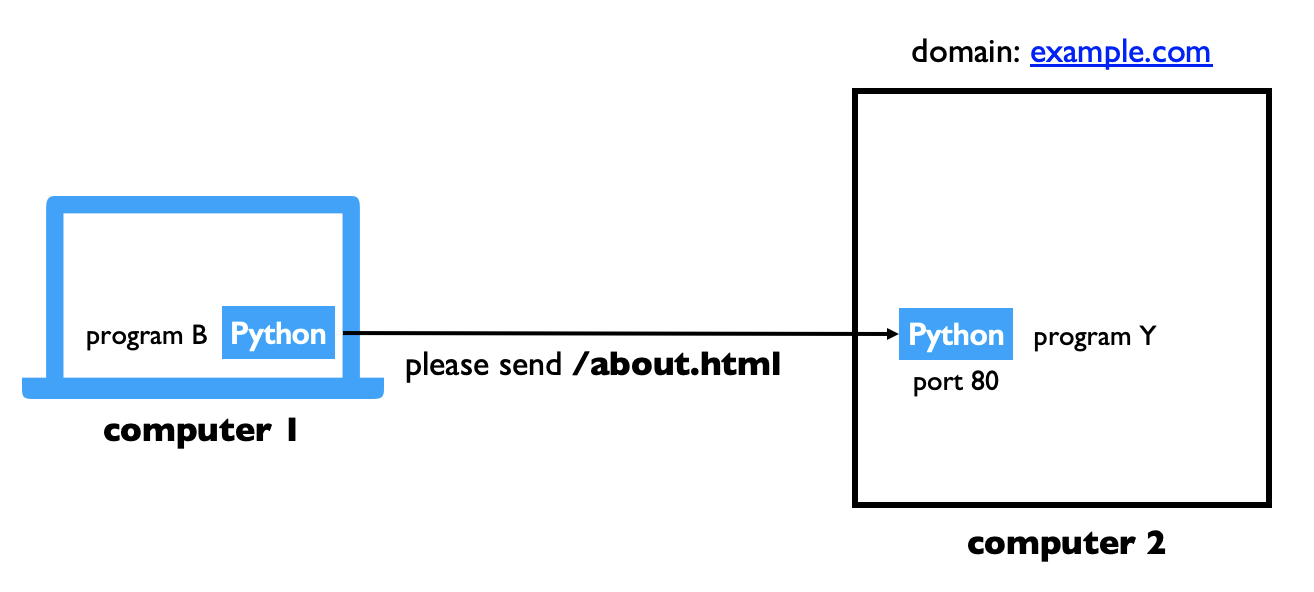
    
 - HTTP protocol
     - URL
     - Headers
     - Status Codes
 - The requests module

## HTTP Status Codes you need to know
- 200: success
- 404: not found

Here is a list of all status codes, you do NOT need to memorize it: https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

## requests.get : Simple string example
- URL: https://cs220.cs.wisc.edu/hello.txt

In [21]:
url = "https://cs220.cs.wisc.edu/hello.txt"
r = requests.get(url) # r is the response
print(r.status_code)
print(r.text)

200
Hello CS220 / CS319 students! Welcome to our website. Hope you are staying safe and healthy!



In [22]:
# Q: What if the web site does not exist?
typo_url = "https://cs220.cs.wisc.edu/hello.txttttt"
r = requests.get(typo_url)
print(r.status_code)
print(r.text)

# A: 

403
<html>
<head><title>403 Forbidden</title></head>
<body>
<h1>403 Forbidden</h1>
<ul>
<li>Code: AccessDenied</li>
<li>Message: Access Denied</li>
<li>RequestId: ZP8GQMH7GWFST525</li>
<li>HostId: jmclWlGJfrQDSXfmc2ili7b8MlVCElGvGIxGr1KFh3QHDKCbh+dOk50F3mhqKvdq3zobS3msck0=</li>
</ul>
<h3>An Error Occurred While Attempting to Retrieve a Custom Error Document</h3>
<ul>
<li>Code: AccessDenied</li>
<li>Message: Access Denied</li>
</ul>
<hr/>
</body>
</html>



In [23]:
# We can check for a status_code error by using an assert
typo_url = "https://cs220.cs.wisc.edu/hello.txttttt"
r = requests.get(typo_url)
assert r.status_code == 200
print(r.status_code)
print(r.text)


AssertionError: 

In [24]:
# Instead of using an assert, we often use raise_for_status()
r = requests.get(typo_url)
r.raise_for_status() #similar to asserting r.status_code == 200
r.text

# Note the error you get.... We will use this in the next cell

HTTPError: 403 Client Error: Forbidden for url: https://cs220.cs.wisc.edu/hello.txttttt

In [27]:
# Let's try to catch that error

try:
    r = requests.get(typo_url)
    r.raise_for_status() #similar to asserting r.status_code == 200
    r.text
except HTTPError as e:
    print("oops!!", e)
    

NameError: name 'HTTPError' is not defined

In [28]:
# we often need to prepend the names of exceptions with the name of the module
# fix the error from above

try:
    r = requests.get(typo_url)
    r.raise_for_status() #similar to asserting r.status_code == 200
    r.text
except requests.HTTPError as e:
    print("oops!!", e)
    


oops!! 403 Client Error: Forbidden for url: https://cs220.cs.wisc.edu/hello.txttttt


## requests.get : JSON file example
- URL: https://cs220.cs.wisc.edu/scores.json
- `json.load` (FILE_OBJECT)
- `json.loads` (STRING)

In [29]:
# GETting a JSON file, the long way
url = "https://cs220.cs.wisc.edu/scores.json"
r = requests.get(url)
r.raise_for_status()
urltext = r.text
print(urltext)
d = json.loads(urltext)
print(type(d), d)

{
  "alice": 100,
  "bob": 200,
  "cindy": 300
}

<class 'dict'> {'alice': 100, 'bob': 200, 'cindy': 300}


In [30]:
# GETting a JSON file, the shortcut way
url = "https://cs220.cs.wisc.edu/scores.json"
#Shortcut to bypass using json.loads()
r = requests.get(url)
r.raise_for_status()
d2 = r.json()
print(type(d2), d2)

<class 'dict'> {'alice': 100, 'bob': 200, 'cindy': 300}


## Good GET Etiquette

Don't make a lot of requests to the same server all at once.
 - Requests use up the server's time
 - Major websites will often ban users who make too many requests
 - You can break a server....similar to DDoS attacks (DON'T DO THIS)
 
In CS220 we will usually give you a link to a copied file to avoid overloading the site.


### Explore real-world JSON

How to explore an unknown JSON?
- If you run into a `dict`, try `.keys()` method to look at the keys of the dictionary, then use lookup process to explore further
- If you run into a `list`, iterate over the list and print each item

### Weather for UW-Madison campus
- URL: https://api.weather.gov/gridpoints/MKX/37,63/forecast

In [32]:
# TODO: GET the forecast
url = "https://api.weather.gov/gridpoints/MKX/37,63/forecast"
r = requests.get(url)
r.raise_for_status()
weather_data = r.json()

# TODO: explore the type of the data structure 
print(type(weather_data))

# display the data
weather_data


<class 'dict'>


{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-89.4424534, 43.0614553],
    [-89.4436673, 43.0398245],
    [-89.4140708, 43.0389351],
    [-89.41285040000001, 43.060565800000006],
    [-89.4424534, 43.0614553]]]},
 'properties': {'updated': '2023-07-25T22:24:51+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-07-26T00:59:35+00:00',
  'updateTime': '2023-07-25T22:24:51+00:00',
  'validTimes': '2023-07-25T16:00:00+00:00/P7DT9H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 259.08},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-07-25T19:00:00-05:00',
    'endTime': '2023-07-26T06:00:00-05:00',
 

In [33]:
# TODO: display the keys of the weather_data dict
print(weather_data.keys())

# TODO: lookup the value corresponding to the 'properties'
print(weather_data['properties'])

# TODO: you know what to do next ... explore type again
print(type(weather_data['properties']))

dict_keys(['@context', 'type', 'geometry', 'properties'])
{'updated': '2023-07-25T22:24:51+00:00', 'units': 'us', 'forecastGenerator': 'BaselineForecastGenerator', 'generatedAt': '2023-07-26T00:59:35+00:00', 'updateTime': '2023-07-25T22:24:51+00:00', 'validTimes': '2023-07-25T16:00:00+00:00/P7DT9H', 'elevation': {'unitCode': 'wmoUnit:m', 'value': 259.08}, 'periods': [{'number': 1, 'name': 'Tonight', 'startTime': '2023-07-25T19:00:00-05:00', 'endTime': '2023-07-26T06:00:00-05:00', 'isDaytime': False, 'temperature': 69, 'temperatureUnit': 'F', 'temperatureTrend': None, 'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 30}, 'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 19.444444444444443}, 'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 84}, 'windSpeed': '5 to 10 mph', 'windDirection': 'S', 'icon': 'https://api.weather.gov/icons/land/night/bkn/tsra_hi,30?size=medium', 'shortForecast': 'Mostly Cloudy then Chance Showers And Thunderstorms', 'detailedFor

In [34]:
# TODO: display the keys of the properties dict
print(weather_data['properties'].keys())

# TODO: lookup the value corresponding to the 'periods'
print(weather_data['properties']['periods'])

# TODO: you know what to do next ... explore type again
print(type(weather_data['properties']['periods']))

dict_keys(['updated', 'units', 'forecastGenerator', 'generatedAt', 'updateTime', 'validTimes', 'elevation', 'periods'])
[{'number': 1, 'name': 'Tonight', 'startTime': '2023-07-25T19:00:00-05:00', 'endTime': '2023-07-26T06:00:00-05:00', 'isDaytime': False, 'temperature': 69, 'temperatureUnit': 'F', 'temperatureTrend': None, 'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 30}, 'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 19.444444444444443}, 'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 84}, 'windSpeed': '5 to 10 mph', 'windDirection': 'S', 'icon': 'https://api.weather.gov/icons/land/night/bkn/tsra_hi,30?size=medium', 'shortForecast': 'Mostly Cloudy then Chance Showers And Thunderstorms', 'detailedForecast': 'A chance of showers and thunderstorms after 3am. Mostly cloudy, with a low around 69. South wind 5 to 10 mph. Chance of precipitation is 30%. New rainfall amounts less than a tenth of an inch possible.'}, {'number': 2, 'name': 'Wednesday', 

In [37]:
# TODO: extract periods list into a variable
periods_list = weather_data['properties']['periods']

# TODO: create a DataFrame using periods_list
period_df = pd.DataFrame(periods_list)

# TODO: What does each inner data structure represent in your DataFrame?
#       Keep in mind that outer data structure is a list.

period_df.head()

number             name                  startTime  \
0       1          Tonight  2023-07-25T19:00:00-05:00   
1       2        Wednesday  2023-07-26T06:00:00-05:00   
2       3  Wednesday Night  2023-07-26T18:00:00-05:00   
3       4         Thursday  2023-07-27T06:00:00-05:00   
4       5   Thursday Night  2023-07-27T18:00:00-05:00   

                     endTime  isDaytime  temperature temperatureUnit  \
0  2023-07-26T06:00:00-05:00      False           69               F   
1  2023-07-26T18:00:00-05:00       True           87               F   
2  2023-07-27T06:00:00-05:00      False           69               F   
3  2023-07-27T18:00:00-05:00       True           93               F   
4  2023-07-28T06:00:00-05:00      False           73               F   

  temperatureTrend                      probabilityOfPrecipitation  \
0             None    {'unitCode': 'wmoUnit:percent', 'value': 30}   
1             None    {'unitCode': 'wmoUnit:percent', 'value': 50}   
2             None  {'unitCode': 'wmoUnit:percent', 'value': None}   
3             None  {'unitCode': 'wmoUnit:percent', 'value': None}   
4             None    {'unitCode': 'wmoUnit:percent', 'value': 40}   

                                            dewpoint  \
0  {'unitCode': 'wmoUnit:degC', 'value': 19.44444...   
1  {'unitCode': 'wmoUnit:degC', 'value': 21.11111...   
2  {'unitCode': 'wmoUnit:degC', 'value': 22.22222...   
3  {'unitCode': 'wmoUnit:degC', 'value': 22.22222...   
4  {'unitCode': 'wmoUnit:degC', 'value': 22.22222...   

                               relativeHumidity    windSpeed windDirection  \
0  {'unitCode': 'wmoUnit:percent', 'value': 84}  5 to 10 mph             S   
1  {'unitCode': 'wmoUnit:percent', 'value': 93}       10 mph             W   
2  {'unitCode': 'wmoUnit:percent', 'value': 93}  5 to 10 mph            NW   
3  {'unitCode': 'wmoUnit:percent', 'value': 97}  5 to 10 mph             S   
4  {'unitCode': 'wmoUnit:percent', 'value': 84}  5 to 10 mph             S   

                                                icon  \
0  https://api.weather.gov/icons/land/night/bkn/t...   
1  https://api.weather.gov/icons/land/day/tsra_hi...   
2  https://api.weather.gov/icons/land/night/few?s...   
3  https://api.weather.gov/icons/land/day/hot?siz...   
4  https://api.weather.gov/icons/land/night/tsra_...   

                                       shortForecast  \
0  Mostly Cloudy then Chance Showers And Thunders...   
1                   Chance Showers And Thunderstorms   
2                                       Mostly Clear   
3                                              Sunny   
4                   Chance Showers And Thunderstorms   

                                    detailedForecast  
0  A chance of showers and thunderstorms after 3a...  
1  A chance of showers and thunderstorms before 3...  
2  Mostly clear, with a low around 69. Northwest ...  
3  Sunny, with a high near 93. Heat index values ...  
4  A chance of showers and thunderstorms after 7p...

#### What is the maximum and minimum observed temperatures? Include the temperatureUnit in your display

In [38]:
min_temp = period_df['temperature'].min()
idx_min = period_df['temperature'].idxmin()
min_unit = period_df.loc[idx_min, 'temperatureUnit']

max_temp = period_df['temperature'].max()
idx_max = period_df['temperature'].idxmax()
max_unit = period_df.loc[idx_max, 'temperatureUnit']

print("Minimum observed temperature is: {} degree {}".format(min_temp, min_unit))
print("Maximum observed temperature is: {} degree {}".format(max_temp, max_unit))

Minimum observed temperature is: 60 degree F
Maximum observed temperature is: 93 degree F


#### Which days `detailedForecast` contains `thunderstorms`?

In [40]:
storm_days_df = period_df[period_df["detailedForecast"].str.contains("thunderstorms")]
storm_days_df

number            name                  startTime  \
0       1         Tonight  2023-07-25T19:00:00-05:00   
1       2       Wednesday  2023-07-26T06:00:00-05:00   
4       5  Thursday Night  2023-07-27T18:00:00-05:00   
5       6          Friday  2023-07-28T06:00:00-05:00   
6       7    Friday Night  2023-07-28T18:00:00-05:00   
7       8        Saturday  2023-07-29T06:00:00-05:00   

                     endTime  isDaytime  temperature temperatureUnit  \
0  2023-07-26T06:00:00-05:00      False           69               F   
1  2023-07-26T18:00:00-05:00       True           87               F   
4  2023-07-28T06:00:00-05:00      False           73               F   
5  2023-07-28T18:00:00-05:00       True           92               F   
6  2023-07-29T06:00:00-05:00      False           66               F   
7  2023-07-29T18:00:00-05:00       True           82               F   

  temperatureTrend                    probabilityOfPrecipitation  \
0             None  {'unitCode': 'wmoUnit:percent', 'value': 30}   
1             None  {'unitCode': 'wmoUnit:percent', 'value': 50}   
4             None  {'unitCode': 'wmoUnit:percent', 'value': 40}   
5             None  {'unitCode': 'wmoUnit:percent', 'value': 40}   
6             None  {'unitCode': 'wmoUnit:percent', 'value': 50}   
7             None  {'unitCode': 'wmoUnit:percent', 'value': 30}   

                                            dewpoint  \
0  {'unitCode': 'wmoUnit:degC', 'value': 19.44444...   
1  {'unitCode': 'wmoUnit:degC', 'value': 21.11111...   
4  {'unitCode': 'wmoUnit:degC', 'value': 22.22222...   
5  {'unitCode': 'wmoUnit:degC', 'value': 22.22222...   
6  {'unitCode': 'wmoUnit:degC', 'value': 22.77777...   
7  {'unitCode': 'wmoUnit:degC', 'value': 17.77777...   

                               relativeHumidity     windSpeed windDirection  \
0  {'unitCode': 'wmoUnit:percent', 'value': 84}   5 to 10 mph             S   
1  {'unitCode': 'wmoUnit:percent', 'value': 93}        10 mph             W   
4  {'unitCode': 'wmoUnit:percent', 'value': 84}   5 to 10 mph             S   
5  {'unitCode': 'wmoUnit:percent', 'value': 84}        10 mph             S   
6  {'unitCode': 'wmoUnit:percent', 'value': 90}  10 to 15 mph            NE   
7  {'unitCode': 'wmoUnit:percent', 'value': 90}  10 to 15 mph            NE   

                                                icon  \
0  https://api.weather.gov/icons/land/night/bkn/t...   
1  https://api.weather.gov/icons/land/day/tsra_hi...   
4  https://api.weather.gov/icons/land/night/tsra_...   
5  https://api.weather.gov/icons/land/day/tsra_hi...   
6  https://api.weather.gov/icons/land/night/tsra_...   
7  https://api.weather.gov/icons/land/day/tsra_hi...   

                                       shortForecast  \
0  Mostly Cloudy then Chance Showers And Thunders...   
1                   Chance Showers And Thunderstorms   
4                   Chance Showers And Thunderstorms   
5                   Chance Showers And Thunderstorms   
6                   Chance Showers And Thunderstorms   
7  Chance Showers And Thunderstorms then Mostly S...   

                                    detailedForecast  
0  A chance of showers and thunderstorms after 3a...  
1  A chance of showers and thunderstorms before 3...  
4  A chance of showers and thunderstorms after 7p...  
5  A chance of showers and thunderstorms. Mostly ...  
6  A chance of showers and thunderstorms before 1...  
7  A chance of showers and thunderstorms before 7...

In [ ]:
# Extract only the name column information for the subset DataFrame


#### Which day's `detailedForecast` has the most lengthy description?

In [41]:
idx_max_desc = period_df['detailedForecast'].str.len().idxmax()
period_df.iloc[idx_max_desc]['name']

'Friday Night'

In [43]:
# What was that forecast?
period_df.loc[idx_max_desc, "detailedForecast"]

'A chance of showers and thunderstorms before 1am, then a chance of showers and thunderstorms. Mostly cloudy, with a low around 66. Northeast wind 10 to 15 mph. Chance of precipitation is 50%. New rainfall amounts between a tenth and quarter of an inch possible.'

### Write it out to a CSV file on your drive
You now have your own copy!

In [ ]:
# Write it all out to a single CSV file
period_df.to_csv("campus_weather.csv", index=False)

### Other Cool APIs

- City of Madison Transit: http://transitdata.cityofmadison.com/
- Reddit: https://reddit.com/r/UWMadison.json
- Lord of the Rings: https://the-one-api.dev/
- Pokemon: https://pokeapi.co/

Remember: Be judicious when making requests; don't overwhelm the server! :)

## Next Time
What other documents can we get via the Web? HTML is very popular! We'll explore this.